## Etapa 1: Compreender

### Libraries 

In [1]:
import pandas as pd
import numpy as np

### Read

In [2]:
df = pd.read_csv('tempo.csv', delimiter=";")
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


↑ Considerações: antes de prosseguir, já identifiquei a seguinte **lista de tarefas**:
* na coluna aparência tem um dado categorico "menos", onde deveria ser sol, nublado, chuva
* na coluna temperatura tem uma temperatura 1220 indicando outlier
* Posso criar uma coluna de temperatura em graus Célsius () → uma função também?
* na coluna umidade tem NaN; tem 200, isso é um outlier?; posso converter para int?
* em vento tem NaN
* Jogar significa se dá para jogar bola no dia em questão para fazer possíveis previsões. (quais padrões?)

### Shape 

In [3]:
df.shape

(14, 5)

↑ Considerações: (14 linhas [contanto o cabeçalho], 5 colunas [não contanto o index do pandas])

### Head e Tail

In [4]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
df.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


### Columns

In [6]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

### Info

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes


### Describe (números)

In [8]:
df.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


### Unique (categorias) 

In [9]:
print(df['Aparencia'].unique())

df.groupby(['Aparencia']).size()

['sol' 'nublado' 'chuva' 'menos']


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [10]:
print(df['Vento'].unique())

df.groupby(['Vento']).size()



['FALSO' 'VERDADEIRO' nan]


Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [11]:
print(df['Jogar'].unique())

df.groupby(['Jogar']).size()

['nao' 'sim']


Jogar
nao    5
sim    9
dtype: int64

## Etapa 2: Limpar Colunas e Linhas

⚠️ Eu aprendi que a limpeza de dados é um processo iterativo e contínuo, isto é, todas as sub-etapas de limpeza podem ou devem ser executadas em todas as colunas ou linhas que sejam necessárias.

### Verificar Valores Ausentes: isnull()

In [12]:
#Completo:
df.isnull()


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,True,False


In [13]:
#Compacto:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

↑ Considerações: como não é possível converter uma coluna de float para int que contenha nulos (NaN), é preciso pensar:
* Transformar NaN em 0 pode criar um outlier: 
    * `df['Umidade'].fillna(0, inplace = True)`
* Tentar adivinhar o valor da Umidade a partir dos outros dados dos dias de chuva demanda tempo e recursos: 
    1. Análise de Regressão Linear
    2. Árvores de Decisão
    3. Random Forest
    4. Redes Neurais
    5. Análise de Correlação
    6. Validação Cruzada
* Excluir uma certa quantidade de Linhas com NaN poderia prejudicar o número de itens registrados: 
    * `df.dropna()`

De todas as alternativas, qual gera um mínimo impacto no estudo/ projeto? Qual tem o melhor custo e benefício? Qual tem o melhor trade-off? E os seus devidos por quês.

### Tratar Valores Ausentes: NaN ou Null

No caso, eu decidi prosseguir por excluir uma só linha que contém NaN pois terá um impacto nulo para fins de estudo, mas criarei um outro caderno me aprodundando mais neste assunto!

In [14]:
# df.dropna() → se faço assim, só é exibido os dados sem NaN temporariamente. 
# df = df.dropna() → é preciso salvar essa visualização em uma variável para que ela seja definitiva:
df = df.dropna()
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim


⚠️ ↑ repare que os índices em que as linhas continham NaN foram definitavemente deletadas: [2, _, 4, ..., 8, _, 10]

### Padronizar as categorias

In [15]:
#Fazer o código por etapas para entender:
df.loc[df['Aparencia'] == "menos"] #Mostra a linha que contém "menos"
df.loc[df['Aparencia'] == "menos", 'Aparencia'] # Mostra o campo da coluna "Aparencia" que contém "menos"
df.loc[df['Aparencia'] == "menos", 'Aparencia'] = 'chuva' # Substitui o valor do campo por 'chuva'
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,chuva,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim


### Conversão de Tipos de Dados (DType)

In [16]:
df['Umidade'] = df['Umidade'].astype(int)
df

C:\Users\Utente\AppData\Local\Temp\ipykernel_18544\1056530228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Umidade'] = df['Umidade'].astype(int)


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85,FALSO,nao
1,sol,80,90,VERDADEIRO,nao
2,nublado,83,86,FALSO,sim
4,chuva,68,80,FALSO,sim
5,chuva,65,70,VERDADEIRO,nao
6,chuva,64,65,VERDADEIRO,sim
7,sol,1220,95,FALSO,nao
8,sol,69,70,FALSO,sim
10,sol,75,70,VERDADEIRO,sim
11,nublado,72,90,VERDADEIRO,sim


### Linhas duplicadas e/ou redundantes 

In [17]:
#Completa
df.duplicated()

0     False
1     False
2     False
4     False
5     False
6     False
7     False
8     False
10    False
11    False
12    False
13    False
dtype: bool

In [18]:
#Compacta
df.duplicated().sum()

np.int64(0)

### Engenharia de Features

Criar a coluna Temp. Celsius a partir da coluna Fahrenheit
Insira as fórmulas matemáticas em Latex dentro de $

$ z = x + y $

In [19]:
#Criar a coluna Temp. Celsius a partir da coluna Fahrenheit
df['Temp. °C'] = round((5/9)*(df['Temperatura']-32),1)
df

C:\Users\Utente\AppData\Local\Temp\ipykernel_18544\2499993192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp. °C'] = round((5/9)*(df['Temperatura']-32),1)


,Aparencia,Temperatura,Umidade,Vento,Jogar,Temp. °C
0,sol,85,85,FALSO,nao,29.4
1,sol,80,90,VERDADEIRO,nao,26.7
2,nublado,83,86,FALSO,sim,28.3
4,chuva,68,80,FALSO,sim,20.0
5,chuva,65,70,VERDADEIRO,nao,18.3
6,chuva,64,65,VERDADEIRO,sim,17.8
7,sol,1220,95,FALSO,nao,660.0
8,sol,69,70,FALSO,sim,20.6
10,sol,75,70,VERDADEIRO,sim,23.9
11,nublado,72,90,VERDADEIRO,sim,22.2


↑ Considerações: aqui eu posso remover a coluna de °F depois de criar a conversão para °C usando a fórmula matemática:
$$
°C = \frac{5}{9} \times (°F - 32)
$$

Ou seja, você subtrai 32 da temperatura em Fahrenheit, multiplica por 5 e depois divide por 9.

### Outliers ou valores impossíveis 

Como um valor atípico (outlier) pode ser ofensor, isso é, influenciar ou tendenciar um resultado equivoado, precisamos decidir o que fazer com ele.
* Transformar o _outlier_ em 0 pode mantê-lo como um outlier ao contrário: 
    * `df['Umidade'].fillna(0, inplace = True)`
* Tentar adivinhar o valor da Umidade a partir dos outros dados dos dias de chuva demanda tempo e recursos: 
    1. Remover o Outlier
    2. Substituir o Outlier por NaN e Lidar com NaNs
    3. Usar Técnicas de Detecção de Outliers
    4. Aplicar Transformações
    5. Substituir por Limites (Capping)
    6. Imputação com Mediana
    7. Remoção Condicional
    8. Uso de Função Lambda
    9. Clusterização (Ex: DBSCAN)

⚠️ os itens da lista anterior não são diretamente usadas para tratar outliers, mas sim para analisar e modelar dados.

* Excluir uma certa quantidade de Linhas com NaN poderia prejudicar o número de itens registrados: 
    * `df.dropna()`

De todas as alternativas, qual gera um mínimo impacto no estudo/ projeto? Qual tem o melhor custo e benefício? Qual tem o melhor trade-off? E os seus devidos por quês.

Tentantiva 1: Substituir os valores acima ou abaixo de um certo limite por um valor máximo ou mínimo aceitável

In [20]:
#Tentantiva usando 
limite_superior = df['Temp. °C'].quantile(0.95)
limite_inferior = df['Temp. °C'].quantile(0.05)

print(" Limite superior:", round(limite_superior, 2))
print(" Limite inferior:", round(limite_inferior, 2)) 

 Limite superior: 313.17
 Limite inferior: 18.08


In [21]:
# Sintaxe: numpy.where(condition, [x, y, ]/)
df['Temp. °C'] = np.where(df['Temp. °C'] > limite_superior, round(limite_superior, 1), df['Temp. °C'])
df

C:\Users\Utente\AppData\Local\Temp\ipykernel_18544\1338815895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp. °C'] = np.where(df['Temp. °C'] > limite_superior, round(limite_superior, 1), df['Temp. °C'])


,Aparencia,Temperatura,Umidade,Vento,Jogar,Temp. °C
0,sol,85,85,FALSO,nao,29.4
1,sol,80,90,VERDADEIRO,nao,26.7
2,nublado,83,86,FALSO,sim,28.3
4,chuva,68,80,FALSO,sim,20.0
5,chuva,65,70,VERDADEIRO,nao,18.3
6,chuva,64,65,VERDADEIRO,sim,17.8
7,sol,1220,95,FALSO,nao,313.2
8,sol,69,70,FALSO,sim,20.6
10,sol,75,70,VERDADEIRO,sim,23.9
11,nublado,72,90,VERDADEIRO,sim,22.2


↑ Considerações: aqui o número outlier do índice 7 continuou outlier, ou seja, essa abordagem não foi adequada para esta situação.

Tentativa 2: Substituir o outlier pela mediana

In [22]:
# Calcula a média dos valores na coluna 'Temp. °C'
temp_mean = df['Temp. °C'].mean()

# Calcula a mediana dos valores na coluna 'Temp. °C'
temp_median = df['Temp. °C'].median()

# Verifica quais valores na coluna 'Temp. °C' são maiores que a média
df['Temp. °C'] > temp_mean

# Substitui os valores que são maiores que a média pela mediana arredondada com duas casas decimais
df.loc[(df['Temp. °C'] > temp_mean), 'Temp. °C'] = round(temp_median, 1)

# Exibe o DataFrame atualizado
df


,Aparencia,Temperatura,Umidade,Vento,Jogar,Temp. °C
0,sol,85,85,FALSO,nao,29.4
1,sol,80,90,VERDADEIRO,nao,26.7
2,nublado,83,86,FALSO,sim,28.3
4,chuva,68,80,FALSO,sim,20.0
5,chuva,65,70,VERDADEIRO,nao,18.3
6,chuva,64,65,VERDADEIRO,sim,17.8
7,sol,1220,95,FALSO,nao,23.0
8,sol,69,70,FALSO,sim,20.6
10,sol,75,70,VERDADEIRO,sim,23.9
11,nublado,72,90,VERDADEIRO,sim,22.2


↑ Considerações: Funcionei bem substituir os valores que são maiores que a média pela mediana arredondada com duas casas decimais

#### Renomear a coluna de emperatura para Temperatura Fahrenheit

In [23]:
#Renomear a coluna de Temperatura para Temperatura Fahrenheit
df.rename(columns = {"Temperatura" : "Temp. °F"}, inplace = True)
df

C:\Users\Utente\AppData\Local\Temp\ipykernel_18544\2463772560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"Temperatura" : "Temp. °F"}, inplace = True)


,Aparencia,Temp. °F,Umidade,Vento,Jogar,Temp. °C
0,sol,85,85,FALSO,nao,29.4
1,sol,80,90,VERDADEIRO,nao,26.7
2,nublado,83,86,FALSO,sim,28.3
4,chuva,68,80,FALSO,sim,20.0
5,chuva,65,70,VERDADEIRO,nao,18.3
6,chuva,64,65,VERDADEIRO,sim,17.8
7,sol,1220,95,FALSO,nao,23.0
8,sol,69,70,FALSO,sim,20.6
10,sol,75,70,VERDADEIRO,sim,23.9
11,nublado,72,90,VERDADEIRO,sim,22.2


### Remover ruídos 

Colunas inúteis e/ou redundantes:
Apagar a coluna Fahreinheit

In [24]:
df = df.drop(columns=['Temp. °F'])
df


,Aparencia,Umidade,Vento,Jogar,Temp. °C
0,sol,85,FALSO,nao,29.4
1,sol,90,VERDADEIRO,nao,26.7
2,nublado,86,FALSO,sim,28.3
4,chuva,80,FALSO,sim,20.0
5,chuva,70,VERDADEIRO,nao,18.3
6,chuva,65,VERDADEIRO,sim,17.8
7,sol,95,FALSO,nao,23.0
8,sol,70,FALSO,sim,20.6
10,sol,70,VERDADEIRO,sim,23.9
11,nublado,90,VERDADEIRO,sim,22.2


## Etapa 3: Relacionar

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

### Análise univariada:
Foca em uma única variável, ajudando a entender sua distribuição e características básicas.  


#### Distribuição de Frequências

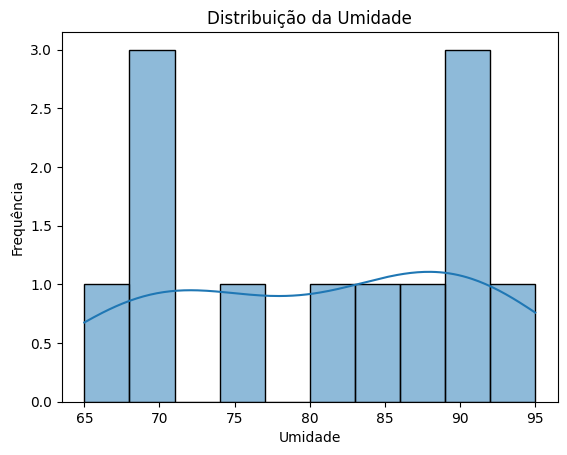

In [26]:
# Histograma: visualizar a distribuição da coluna umidade
sns.histplot(df['Umidade'], bins=10, kde=True)
plt.title("Distribuição da Umidade")
plt.xlabel('Umidade')
plt.ylabel('Frequência')
plt.show()

**↑ Interpretação:** O histograma da umidade mostra como os valores de umidade estão distribuídos. Cada barra representa a frequência de um intervalo de umidade. Se as barras são altas, significa que muitos dias tiveram umidade naquela faixa. A curva KDE (Kernel Density Estimation) ajuda a visualizar a distribuição contínua dos dados. Vemos que a maioria dos dias tem uma umidade entre 70 e 90.

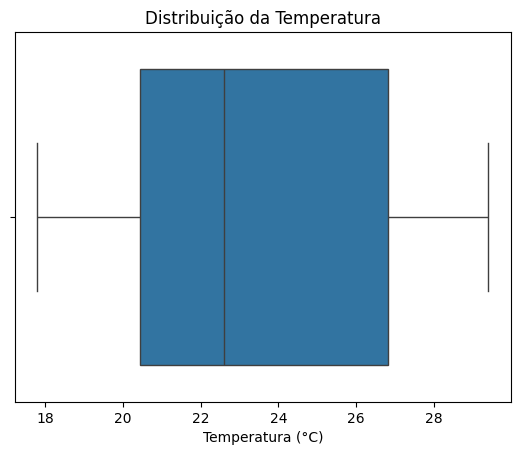

In [27]:
# Box Plot: visualizar a distribuição da temperatura
sns.boxplot(x = df['Temp. °C'])
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura (°C)')
plt.show()

**↑ Interpretação:** O boxplot mostra a distribuição da temperatura. A linha dentro da caixa representa a mediana, e as bordas da caixa mostram o primeiro e o terceiro quartis. Os "whiskers" se estendem aos valores mais extremos não considerados outliers, e os pontos fora dos whiskers são outliers. Observamos que a maior parte das temperaturas está entre 18°C e 27°C, com alguns outliers.

#### Medidas de Tendência Central

#### Medidas de Dispersão

#### Q-Q Plot

### Análise bivariada:
Explora a relação entre duas variáveis, buscando padrões e correlações.  


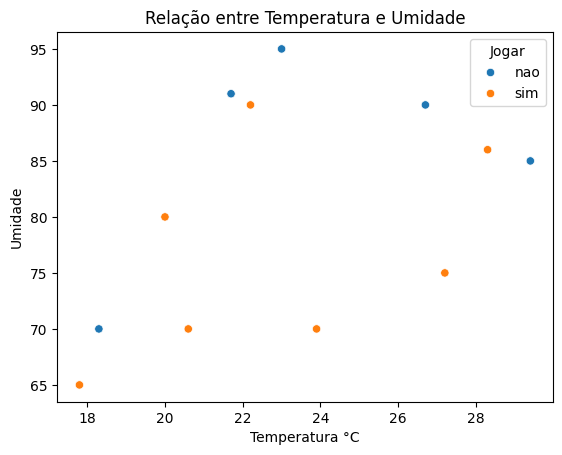

In [28]:
#Gráfico de Dispersão: Temperatura vs. Umidade
sns.scatterplot(x = 'Temp. °C', y = 'Umidade', data = df, hue = 'Jogar')
plt.title('Relação entre Temperatura e Umidade')
plt.xlabel('Temperatura °C')
plt.ylabel('Umidade')
plt.show()

**↑ Interpretação:** O gráfico de dispersão mostra a relação entre temperatura e umidade, com pontos coloridos de acordo com a decisão de jogar (sim ou não). Não parece haver uma relação clara entre temperatura e umidade. No entanto, podemos ver que a decisão de jogar (sim) está espalhada ao longo de várias combinações de temperatura e umidade.

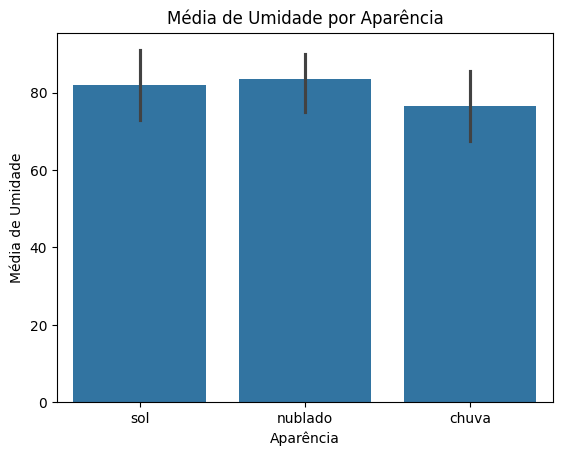

In [29]:
#Heatmap das Correlações
sns.barplot(x = 'Aparencia', y = 'Umidade', data = df)
plt.title('Média de Umidade por Aparência')
plt.xlabel('Aparência')
plt.ylabel('Média de Umidade')
plt.show()


**↑ Interpretação:** O gráfico de barras compara a média da umidade para cada tipo de aparência (sol, nublado, chuva). Observamos que, em dias nublados, a umidade tende a ser maior em comparação com dias de sol e chuva. Isso pode sugerir que dias nublados são geralmente mais úmidos.

#### Tabela de Contingência

#### Correlação Pearson

#### Correlação Spearman

### Análise multivariada: 
Investiga múltiplas variáveis simultaneamente para identificar interações complexas. 

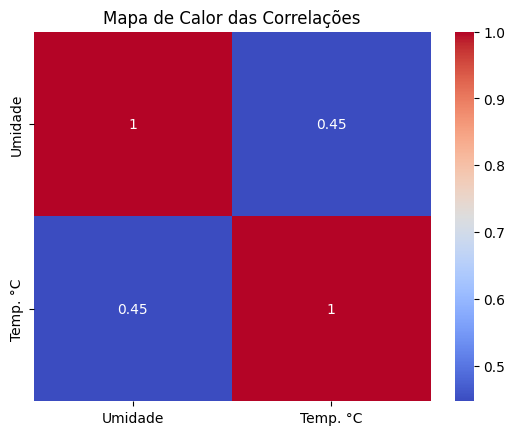

In [38]:
df_num = df[['Umidade','Temp. °C']]
df_num

corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()


**↑ Interpretação:** O heatmap mostra as correlações entre as variáveis numéricas do DataFrame. Cada célula do mapa de calor indica a força e a direção da correlação entre duas variáveis. Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente. Observamos que não há correlações fortes entre as variáveis numéricas aqui apresentadas.

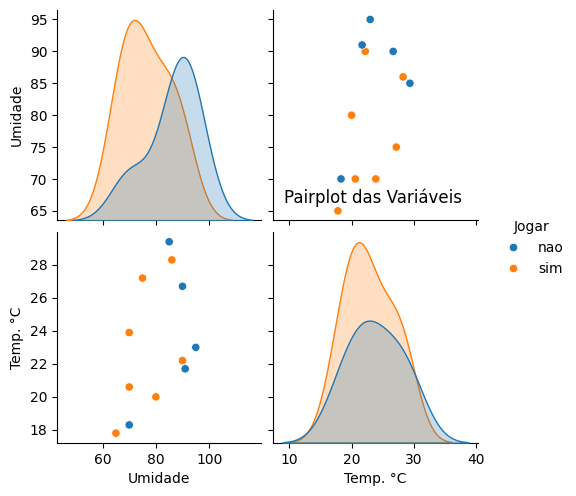

In [39]:
#Pairplot das Variáveis
sns.pairplot(df, hue='Jogar')
plt.title('Pairplot das Variáveis \n')
plt.show()


sns.pairplot(df, hue='Jogar')
plt.title('Pairplot das Variáveis')
plt.show()


**↑ Interpretação:** O pairplot mostra a relação entre todas as variáveis numéricas em pares. Cada gráfico de dispersão no pairplot compara duas variáveis diferentes, e as cores indicam a decisão de jogar. Essa visualização ajuda a identificar possíveis padrões ou relações entre múltiplas variáveis. Podemos observar algumas tendências, mas não uma clara separação entre as variáveis com relação à decisão de jogar.

#### Análise de Regressão (linear ou logística)

#### Análise de Componentes Principais (PCA)

#### Clusterização (K-means)